# EDA_factores_nivel_ingresos Analisis Multivariante

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

# Add src folder to Python path
sys.path.append(os.path.abspath(".."))

from utils import funciones
from utils import bootcampviztools
from utils.funciones import variabilidad
from utils.bootcampviztools import pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_categorical_relationship_fin, plot_multiple_boxplots, plot_combined_graphs, plot_grouped_boxplots,plot_grouped_histograms

In [16]:
df_adult_clean = pd.read_csv("../data/adult_clean.csv")
df = df_adult_clean

In [17]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,recode_never_worked,had_missing_cat,binned_hours_per_week,has_capital_gain,has_capital_loss
0,90,unknown,HS-grad,9,Widowed,unknown,Not-in-family,White,Female,0,4356,40,United-States,<=50K,False,True,40 (full-time),No,Yes
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,False,False,<20 (part-time),No,Yes
2,66,unknown,Some-college,10,Widowed,unknown,Unmarried,Black,Female,0,4356,40,United-States,<=50K,False,True,40 (full-time),No,Yes
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,False,False,40 (full-time),No,Yes
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,False,False,40 (full-time),No,Yes


<h3 align="center">Multivariate analysis: "age","hours_per_week" and "income"</h3>

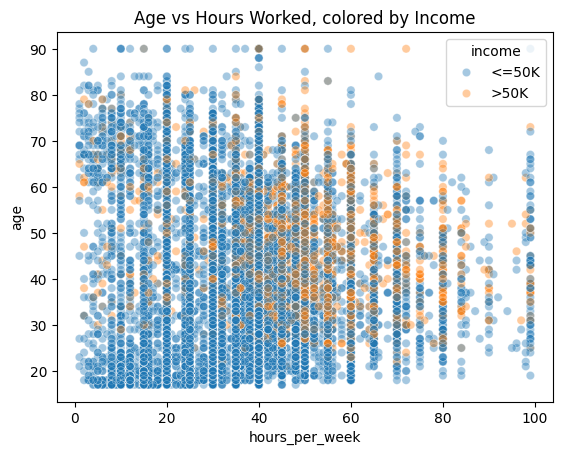

In [18]:
sns.scatterplot(
    data=df,
    y='age',
    x='hours_per_week',
    hue='income',
    alpha=0.4
)

plt.title('Age vs Hours Worked, colored by Income')
plt.show()

### Conclusion 

The plot shows a lot of overlap between the two income groups when looking at age, which suggests that age on its own is not a strong indicator of income. In contrast, people earning more than $50K are more commonly found among those who work longer hours, especially around 40 to 60 hours per week. Very few high-income individuals work fewer than 30 hours, regardless of their age. The highest number of higher earners appears among people in their mid-career years (around 35–55) who work full-time or more, indicating that income is influenced by a combination of age and hours worked rather than either factor alone.

<h3 align="center">Multivariate analysis: "education","sex" and "income"</h3>

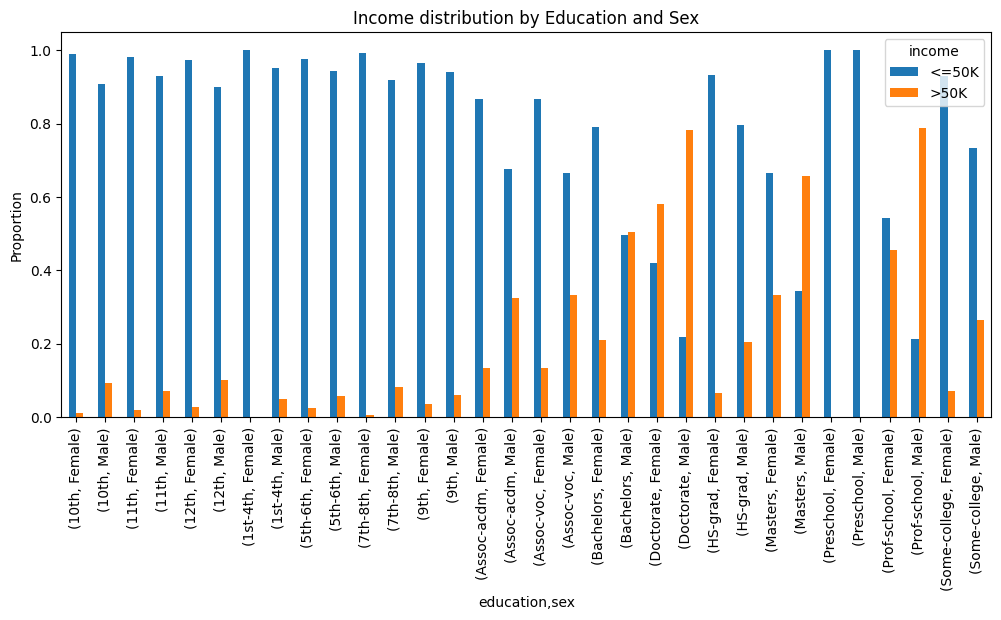

In [19]:
(
    pd.crosstab(
        [df['education'], df['sex']],
        df['income'],
        normalize='index'
    )
    .plot(kind='bar', figsize=(12,5))
)

plt.ylabel('Proportion')
plt.title('Income distribution by Education and Sex')
plt.show()

### Conclusion

The chart shows clear differences in income distribution across education levels and between sexes. At lower education levels, the vast majority of both men and women earn $50K or less, with very few individuals reaching the higher income group. As education level increases, the proportion of people earning >50K also increases, especially from Bachelor’s level onwards.

Across almost all education categories, men are more likely than women to earn >50K, even when they have the same level of education. This gap becomes more noticeable at higher education levels such as Master’s, Professional School, and Doctorate. Overall, the results suggest that while higher education strongly increases the likelihood of higher income, there is also a consistent gender difference in income outcomes within the same education levels.

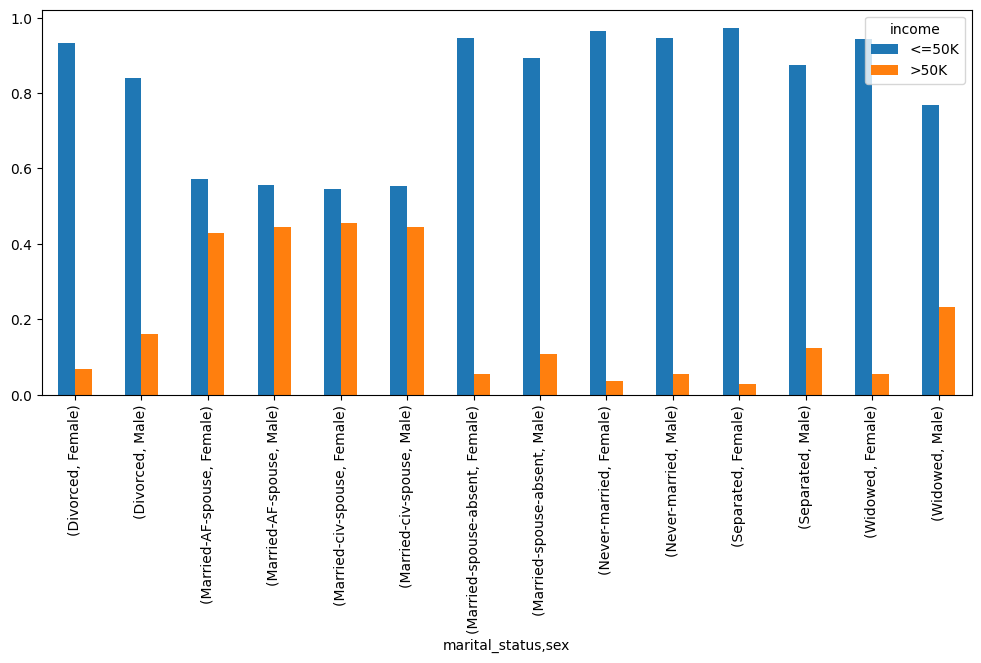

In [27]:
pd.crosstab(
    [df["marital_status"], df["sex"]],
    df["income"],
    normalize="index"
).plot(kind='bar', figsize=(12,5))
plt.show()

#### Conclusion

* Married individuals, especially men, have the highest proportion of incomes above $50K
* Never-married, divorced, separated, and widowed groups are mostly concentrated in the ≤$50K category
* Men consistently earn more than women within the same marital status
* Strong interaction effect between marital status and sex on income

<h3 align="center">Multivariate analysis: "education","hours per week" and "income"</h3>

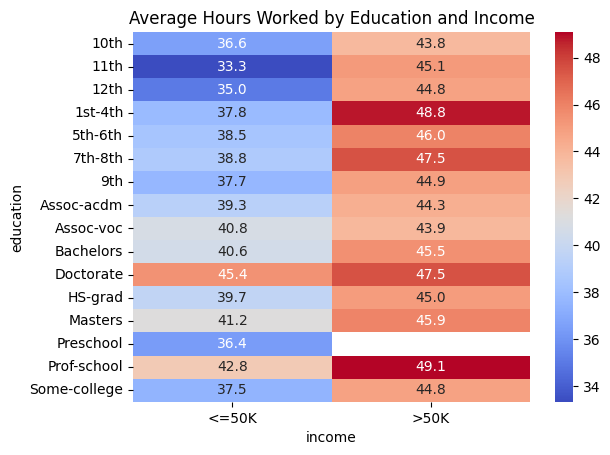

In [21]:
heat = pd.pivot_table(
    df,
    values="hours_per_week",
    index="education",
    columns="income",
    aggfunc="mean"
)

sns.heatmap(heat, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Average Hours Worked by Education and Income")
plt.show()

#### Conclusion

The table shows the following:
* Individuals earning >50K work more hours on average across all education levels. 
* While longer working hours are associated with higher income, education clearly moderates this relationship. 
* Higher-educated individuals are more likely to earn >50K even when working a similar number of hours, indicating that income outcomes are driven by the combination of education level and hours worked rather than hours alone.

<h1 align="center">¿Entre los que tienen capital gain, que factores relacionan con mayores ganancias?</h1>

* To complete this analysis, we will:
 + First create a sub dataframe of individuals that have capital gain and work directly with that dataframe.
 + Second, transform the capital gain column and create a new "log_capital_gain" column to work with.


In [22]:
# create new sub dataframe, filtering only the rows where "has_capital_gains" == Yes i.e capital gains > 0
df_gain = df[df['has_capital_gain'] == 'Yes'].copy()

In [23]:
# create new column "log_capital_gain" with log transformation of capital gain.
df_gain['log_capital_gain'] = np.log1p(df_gain['capital_gain'])

In [24]:
# create a new column, "edu_bin" where we bin "education_num" for better use in multivariate analysis.
edu_bins = [0, 8, 12, 15, 16]
edu_labels = ['<HS', 'HS', 'Some College', 'Bachelor+']

df_gain['edu_bin'] = pd.cut(
    df_gain['education_num'],
    bins=edu_bins,
    labels=edu_labels,
    include_lowest=True
)

In [ ]:
# Show the correlation between the variables using person correlation.
df_gain[['log_capital_gain', 'age', 'education_num', 'hours_per_week']] \
    .corr()

,log_capital_gain,age,education_num,hours_per_week
log_capital_gain,1.000000,0.147675,0.407179,0.274349
age,0.147675,1.000000,0.015930,-0.091194
education_num,0.407179,0.015930,1.000000,0.192064
hours_per_week,0.274349,-0.091194,0.192064,1.000000


In [ ]:
# Spearman correlations between age, education, hours worked,
# and log-transformed capital gain separately for each income group
df_gain.groupby('income')[['log_capital_gain', 'age', 'education_num', 'hours_per_week']].corr(method="spearman")

log_capital_gain       age  education_num  \
income                                                               
<=50K  log_capital_gain          1.000000  0.042888       0.141998   
       age                       0.042888  1.000000      -0.070556   
       education_num             0.141998 -0.070556       1.000000   
       hours_per_week            0.197658 -0.073558       0.117648   
>50K   log_capital_gain          1.000000  0.146810       0.322565   
       age                       0.146810  1.000000       0.025761   
       education_num             0.322565  0.025761       1.000000   
       hours_per_week            0.155115 -0.075125       0.164895   

                         hours_per_week  
income                                   
<=50K  log_capital_gain        0.197658  
       age                    -0.073558  
       education_num           0.117648  
       hours_per_week          1.000000  
>50K   log_capital_gain        0.155115  
       age                    -0.075125  
       education_num           0.164895  
       hours_per_week          1.000000

In [ ]:
# Bin age into ranges to simplify interpretation and reduce the influence of extreme values in summaries
df_gain['age_bin'] = pd.cut(
    df_gain['age'],
    bins=[20, 30, 40, 50, 60, 70, 90],
    right=False
)

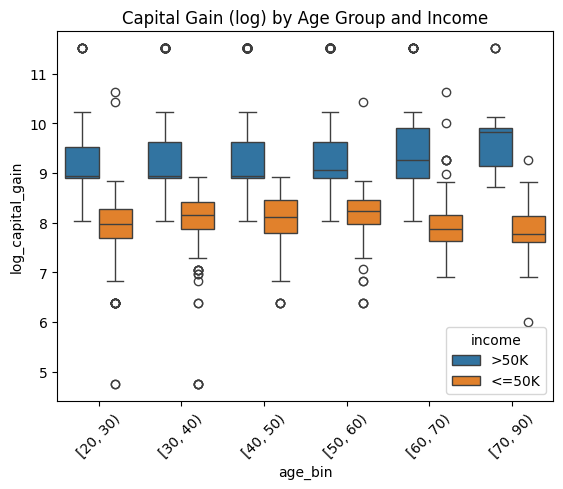

In [ ]:
# Create boxplot for multivariate analysis between age, capital gain and income
sns.boxplot(
    data=df_gain,
    x='age_bin',
    y='log_capital_gain',
    hue='income'
)

plt.xticks(rotation=45)
plt.title('Capital Gain (log) by Age Group and Income')
plt.show()

### Conclusion

* Individuals earning more than $50K have higher capital gains than those earning <=50K across all age groups
* Capital gains increase slightly with age for both income groups, but the difference between income levels remains consistent
* Age on its own does not explain differences in capital gains
* Income level is a much stronger factor than age in explaining capital gains
* Higher-income individuals show a wider spread of capital gains, indicating greater variability and higher potential gains

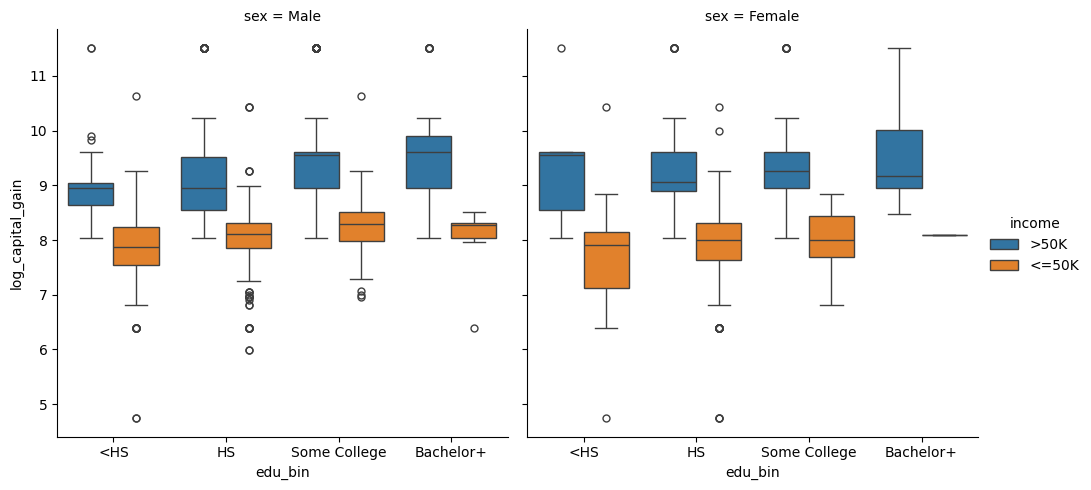

In [28]:
sns.catplot(
    data=df_gain,
    x='edu_bin',
    y='log_capital_gain',
    hue='income',
    col='sex',
    kind='box'
)
plt.show()

#### Conclusion

From these boxplot we can see a similar pattern as observed in the previous analysis.
* Individuals earning >50K have higher capital gains than those earning <=50K across all education levels and for both sexes
* Capital gains generally increase with education level for both men and women
* The income gap in capital gains is present at every education level. This shows that income level is a stronger factor than education alone
* Men tend to have slightly higher capital gains than women within the same education and income groups
* The difference between income groups is larger than the difference between sexes
* Variability in capital gains is greater among higher-income individuals, especially at higher education levels

### Final conclusion for ¿Entre los que tienen capital gain, que factores relacionan con mayores ganancias?

* Individuals earning more than $50K show significantly higher capital gains across all groups analyzed, indicating that income level is the most influential factor.
* Education level shows a clear positive relationship with capital gains, especially among higher-income individuals, where the association is moderate and consistent.
* Age has a positive but weak relationship with capital gains, becoming more relevant among higher-income individuals, which suggests a long-term wealth accumulation effect.
* Hours worked show only a weak relationship with capital gains, indicating that these gains are not directly driven by labor effort.
* Sex introduces smaller differences: men tend to have slightly higher capital gains, but this gap is much smaller than the differences associated with income level or education.